In [73]:
import pandas as pd
import numpy as np 
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjust the configureation of the plots to be created



In [75]:
# Reading of Data  
df = pd.read_csv("movies.csv")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [78]:
# Checking for missing Data 

for data in df.columns:
    percent_missing = np.mean(df[data].isnull())
    print("{} = {}%".format(data,  round(percent_missing, 2)))

name = 0.0%
rating = 0.01%
genre = 0.0%
year = 0.0%
released = 0.0%
score = 0.0%
votes = 0.0%
director = 0.0%
writer = 0.0%
star = 0.0%
country = 0.0%
budget = 0.28%
gross = 0.02%
company = 0.0%
runtime = 0.0%


# Cleaning the data

In [81]:
df.dtypes # Column Datatypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [83]:
df["runtime"] = df["runtime"].fillna(0).astype("int64")
df["gross"] = df["runtime"].fillna(0).astype("int64")
df["votes"] = df["runtime"].fillna(0).astype("int64")
df["budget"] = df["runtime"].fillna(0).astype("int64")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,146,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,146,146,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,104,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,104,104,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,124,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,124,124,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,88,Jim Abrahams,Jim Abrahams,Robert Hays,United States,88,88,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,98,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,98,98,Orion Pictures,98


In [85]:
# # df["ReleasedYearCorrected"] = df["released"].astype(str).str[-4:]
# # df["ReleasedYearCorrected"]

df["Released_year"] = df["released"].str.strip('(Portugal)(Puerto Rico)(West Germany)(Soviet Union)(Uruguay)(Federal Republic of Yugoslavia)(Yugoslavia)(Thailand)(Romania)(Latvia)(Iceland)(Denmark)(Indonesia)(Bahrain)(Finland)(Australia)(Greece)(South Africa)(Mexico)(United Statas)(United Arab Emirate)(Taiwan)(Norway)(Italy)(China)(Lebanon)(Poland)(Japan)(Sweden)(Netherlands)(Brasil)(France)(Ukraine)(Iran)(New Zealand)(Russia)(Ireland)(Portugal)(Bulgaria)(Philippines)(Singapore)(Bahamas)(Croatia)(Turkey)(Hong Kong)(South Korea)(Spain)(poland)(Israel)(India)(Belgium)(Canada)(Hungary)(Argentina)(Germany)(Kuwait)(India)(Cameroon)(United Kingdom)').astype(str).str[-4:]
df["Released_year"] 
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Released_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,146,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,146,146,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,104,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,104,104,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,124,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,124,124,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,88,Jim Abrahams,Jim Abrahams,Robert Hays,United States,88,88,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,98,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,98,98,Orion Pictures,98,1980


In [87]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Released_year
4396,The Best of Youth,R,Drama,2003,"June 20, 2003 (Italy)",8.5,366,Marco Tullio Giordana,Sandro Petraglia,Luigi Lo Cascio,Italy,366,366,BiBi Film,366,2003
1218,Little Dorrit,G,Drama,1987,"October 21, 1988 (United States)",7.3,357,Christine Edzard,Charles Dickens,Derek Jacobi,United Kingdom,357,357,Sands,357,1988
2280,Gettysburg,PG,Drama,1993,"October 8, 1993 (United States)",7.6,271,Ron Maxwell,Michael Shaara,Tom Berenger,United States,271,271,TriStar Television,271,1993
2888,Hamlet,PG-13,Drama,1996,"December 25, 1996 (United States)",7.7,242,Kenneth Branagh,William Shakespeare,Kenneth Branagh,United Kingdom,242,242,Castle Rock Entertainment,242,1996
1868,The Beautiful Troublemaker,Unrated,Drama,1991,"September 4, 1991 (France)",7.6,238,Jacques Rivette,Pascal Bonitzer,Michel Piccoli,France,238,238,Pierre Grise Productions,238,1991


In [89]:
pd.set_option("display.max_rows", None)

# Drop any duplicates

In [92]:
#df['company'].drop_duplicates().sort_values(ascending=False) # This drop duplicate accross the company column
#df.drop_duplicates() # This drop duplicate accross the dataframe

In [67]:
# Budget have high correlation
# Company have high correlation

In [94]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Released_year
4396,The Best of Youth,R,Drama,2003,"June 20, 2003 (Italy)",8.5,366,Marco Tullio Giordana,Sandro Petraglia,Luigi Lo Cascio,Italy,366,366,BiBi Film,366,2003
1218,Little Dorrit,G,Drama,1987,"October 21, 1988 (United States)",7.3,357,Christine Edzard,Charles Dickens,Derek Jacobi,United Kingdom,357,357,Sands,357,1988
2280,Gettysburg,PG,Drama,1993,"October 8, 1993 (United States)",7.6,271,Ron Maxwell,Michael Shaara,Tom Berenger,United States,271,271,TriStar Television,271,1993
2888,Hamlet,PG-13,Drama,1996,"December 25, 1996 (United States)",7.7,242,Kenneth Branagh,William Shakespeare,Kenneth Branagh,United Kingdom,242,242,Castle Rock Entertainment,242,1996
1868,The Beautiful Troublemaker,Unrated,Drama,1991,"September 4, 1991 (France)",7.6,238,Jacques Rivette,Pascal Bonitzer,Michel Piccoli,France,238,238,Pierre Grise Productions,238,1991


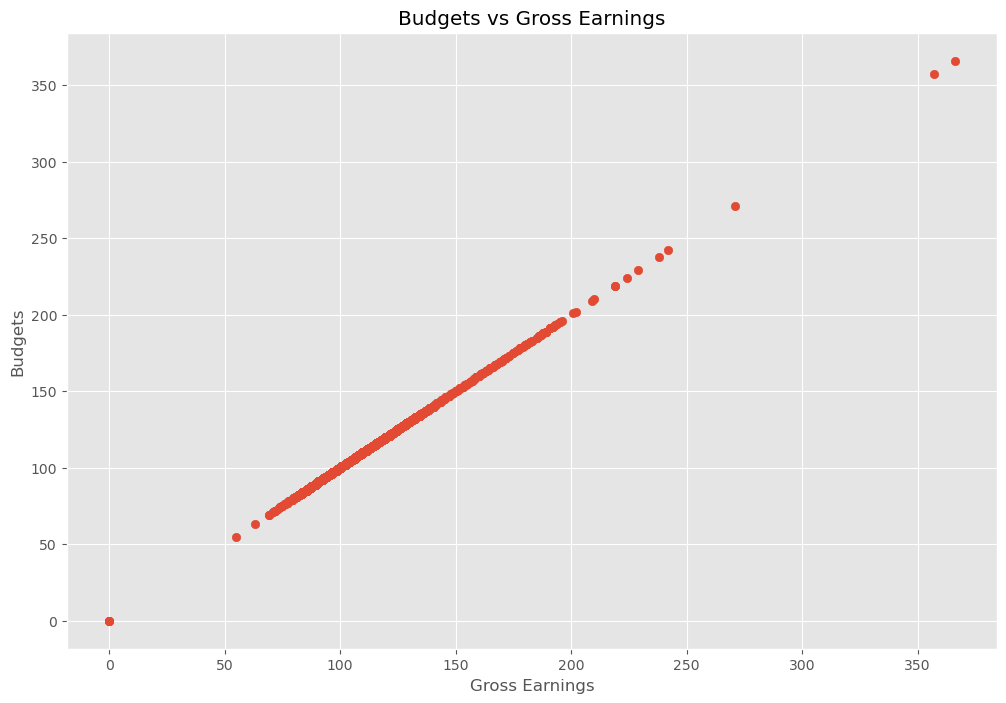

In [96]:
# Compare budget with gross using scattered charts

plt.scatter(x=df['budget'], y=df['gross'])

plt.title("Budgets vs Gross Earnings")

plt.xlabel('Gross Earnings')
plt.ylabel('Budgets')
plt.show()

<Axes: title={'center': 'Budgets vs Gross Earnings'}, xlabel='budget', ylabel='gross'>

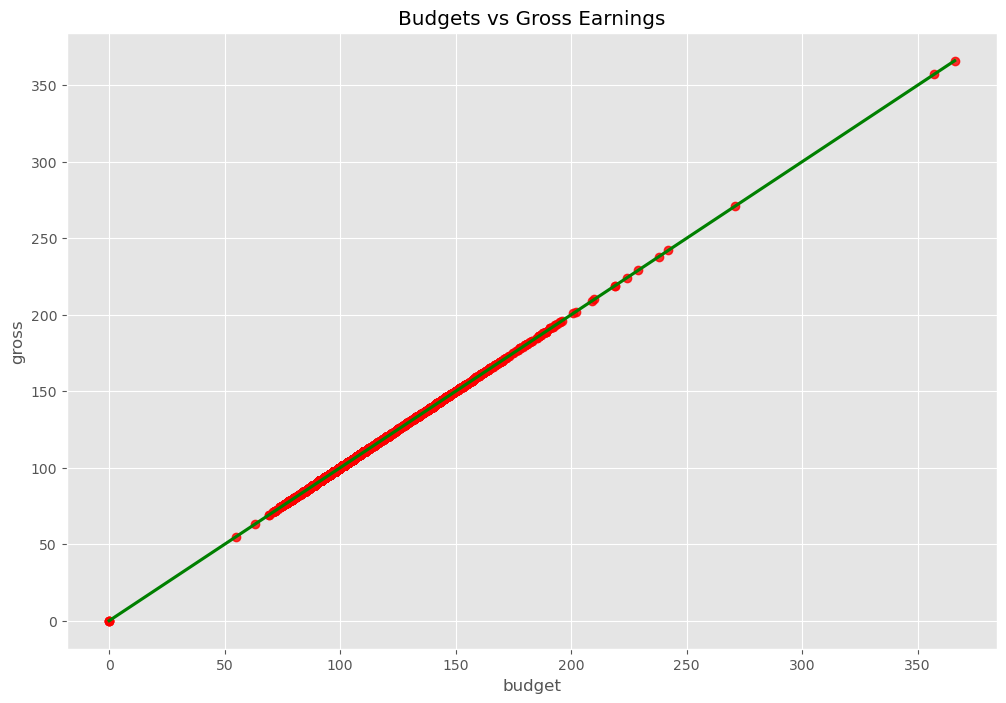

In [98]:
# Compare budget with gross using Seaborn charts

plt.xlabel('Gross Earnings')
plt.ylabel('Budgets')
plt.title("Budgets vs Gross Earnings")
sns.regplot(x='budget', y= 'gross', data=df, scatter_kws={'color': 'red'}, line_kws={'color': 'green'})

In [100]:
# Correletion

# There are three (3) types of correletion
# (1) Pearson (2) Kendall (3) Spearman

In [112]:
df.corr(numeric_only=True) # Default method

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.116358,0.116358,0.116358,0.116358
score,0.097995,1.000000,0.398387,0.398387,0.398387,0.398387
votes,0.116358,0.398387,1.000000,1.000000,1.000000,1.000000
budget,0.116358,0.398387,1.000000,1.000000,1.000000,1.000000
gross,0.116358,0.398387,1.000000,1.000000,1.000000,1.000000
runtime,0.116358,0.398387,1.000000,1.000000,1.000000,1.000000


In [114]:
df.corr(method= 'pearson', numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.116358,0.116358,0.116358,0.116358
score,0.097995,1.000000,0.398387,0.398387,0.398387,0.398387
votes,0.116358,0.398387,1.000000,1.000000,1.000000,1.000000
budget,0.116358,0.398387,1.000000,1.000000,1.000000,1.000000
gross,0.116358,0.398387,1.000000,1.000000,1.000000,1.000000
runtime,0.116358,0.398387,1.000000,1.000000,1.000000,1.000000


In [116]:
df.corr(method= 'kendall', numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.067652,0.096390,0.096390,0.096390,0.096390
score,0.067652,1.000000,0.283966,0.283966,0.283966,0.283966
votes,0.096390,0.283966,1.000000,1.000000,1.000000,1.000000
budget,0.096390,0.283966,1.000000,1.000000,1.000000,1.000000
gross,0.096390,0.283966,1.000000,1.000000,1.000000,1.000000
runtime,0.096390,0.283966,1.000000,1.000000,1.000000,1.000000


In [118]:
df.corr(method= 'spearman', numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.099045,0.141805,0.141805,0.141805,0.141805
score,0.099045,1.000000,0.400394,0.400394,0.400394,0.400394
votes,0.141805,0.400394,1.000000,1.000000,1.000000,1.000000
budget,0.141805,0.400394,1.000000,1.000000,1.000000,1.000000
gross,0.141805,0.400394,1.000000,1.000000,1.000000,1.000000
runtime,0.141805,0.400394,1.000000,1.000000,1.000000,1.000000


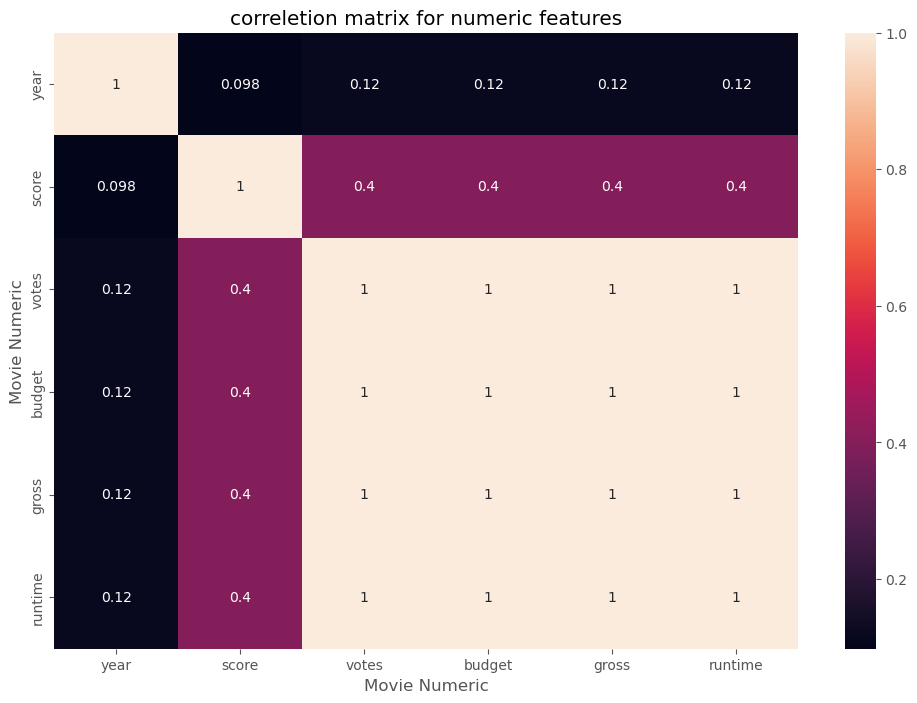

In [120]:
correction_matrix = df.corr(numeric_only=True)

sns.heatmap(correction_matrix, annot = True)

plt.xlabel('Movie Numeric')
plt.ylabel('Movie Numeric')
plt.title("correletion matrix for numeric features")

plt.show()

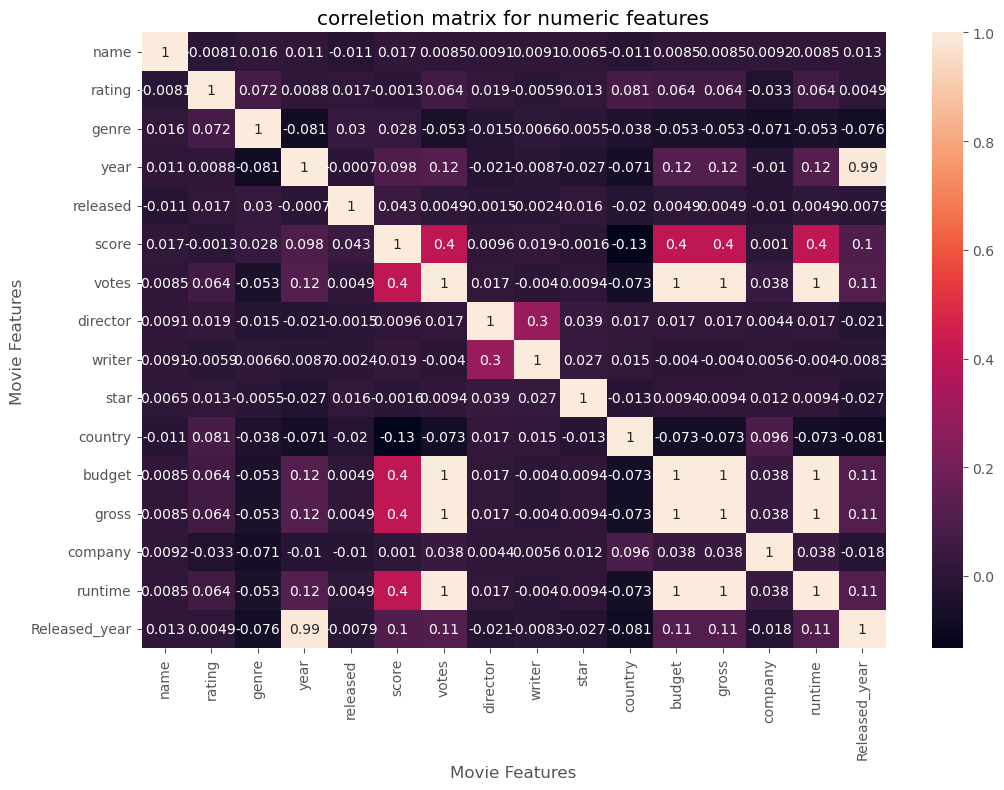

In [128]:
correction_matrix = df.corr('pearson')

sns.heatmap(correction_matrix, annot = True)

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.title("correletion matrix for numeric features")

plt.show()

In [121]:

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Released_year
4396,The Best of Youth,R,Drama,2003,"June 20, 2003 (Italy)",8.5,366,Marco Tullio Giordana,Sandro Petraglia,Luigi Lo Cascio,Italy,366,366,BiBi Film,366,2003
1218,Little Dorrit,G,Drama,1987,"October 21, 1988 (United States)",7.3,357,Christine Edzard,Charles Dickens,Derek Jacobi,United Kingdom,357,357,Sands,357,1988
2280,Gettysburg,PG,Drama,1993,"October 8, 1993 (United States)",7.6,271,Ron Maxwell,Michael Shaara,Tom Berenger,United States,271,271,TriStar Television,271,1993
2888,Hamlet,PG-13,Drama,1996,"December 25, 1996 (United States)",7.7,242,Kenneth Branagh,William Shakespeare,Kenneth Branagh,United Kingdom,242,242,Castle Rock Entertainment,242,1996
1868,The Beautiful Troublemaker,Unrated,Drama,1991,"September 4, 1991 (France)",7.6,238,Jacques Rivette,Pascal Bonitzer,Michel Piccoli,France,238,238,Pierre Grise Productions,238,1991


In [124]:
# Company is not a numeric data, we have to convert it first to numerals

# This is to convert other object type to numerals

df_convert = df

for data in df_convert.columns:
    if (df_convert[data].dtype == 'object'):
        df_convert[data]= df_convert[data].astype('category')
        df_convert[data]= df_convert[data].cat.codes
        
df_convert.head()
    

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Released_year
4396,5546,6,6,2003,1775,8.5,366,1767,3829,1684,25,366,366,391,366,25
1218,3264,1,6,1987,2935,7.3,357,465,649,640,54,357,357,2021,357,10
2280,2194,4,6,1993,3094,7.6,271,2433,3005,2633,55,271,271,2243,271,15
2888,2363,5,6,1996,786,7.7,242,1588,4483,1483,54,242,242,599,242,18
1868,5529,10,6,1991,3353,7.6,238,1140,3249,1893,14,238,238,1850,238,13


In [126]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Released_year
4396,5546,6,6,2003,1775,8.5,366,1767,3829,1684,25,366,366,391,366,25
1218,3264,1,6,1987,2935,7.3,357,465,649,640,54,357,357,2021,357,10
2280,2194,4,6,1993,3094,7.6,271,2433,3005,2633,55,271,271,2243,271,15
2888,2363,5,6,1996,786,7.7,242,1588,4483,1483,54,242,242,599,242,18
1868,5529,10,6,1991,3353,7.6,238,1140,3249,1893,14,238,238,1850,238,13


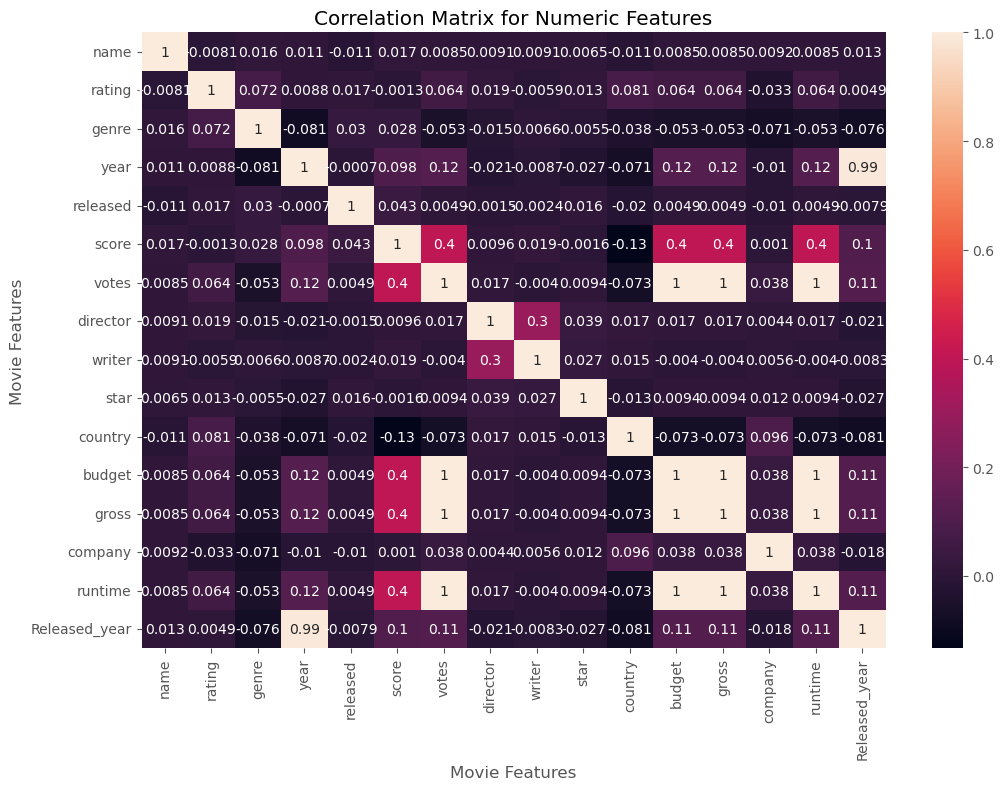

In [138]:
correlation_matrix = df_convert.corr(method='pearson')  # Corrected variable name and spacing

sns.heatmap(correlation_matrix, annot=True)  # Added color map and format for readability

plt.xlabel('Movie Features')  # Label for the x-axis
plt.ylabel('Movie Features')  # Label for the y-axis
plt.title("Correlation Matrix for Numeric Features")  # Fixed typo in title

plt.show()  # Display the heatmap


In [142]:
df_convert.corr(numeric_only=True)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Released_year
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.008483,0.009079,0.009081,0.006472,-0.010737,0.008483,0.008483,0.009211,0.008483,0.012639
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.064133,0.019483,-0.005921,0.013405,0.081244,0.064133,0.064133,-0.032943,0.064133,0.004875
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.052914,-0.015258,0.006567,-0.005477,-0.037615,-0.052914,-0.052914,-0.071067,-0.052914,-0.075845
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.116358,-0.020795,-0.008656,-0.027242,-0.070938,0.116358,0.116358,-0.010431,0.116358,0.991466
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.004852,-0.001478,-0.002404,0.015777,-0.020427,0.004852,0.004852,-0.010474,0.004852,-0.007873
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.398387,0.009559,0.019416,-0.001609,-0.133348,0.398387,0.398387,0.001030,0.398387,0.104645
votes,0.008483,0.064133,-0.052914,0.116358,0.004852,0.398387,1.000000,0.017062,-0.004036,0.009418,-0.073319,1.000000,1.000000,0.037537,1.000000,0.113620
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.017062,1.000000,0.299067,0.039234,0.017490,0.017062,0.017062,0.004404,0.017062,-0.020746
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,-0.004036,0.299067,1.000000,0.027245,0.015343,-0.004036,-0.004036,0.005646,-0.004036,-0.008271
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,0.009418,0.039234,0.027245,1.000000,-0.012998,0.009418,0.009418,0.012442,0.009418,-0.026648


In [144]:
corr_matrix = df_convert.corr(numeric_only=True)
corr_pairs = corr_matrix.unstack()
corr_pairs 

name           name             1.000000
               rating          -0.008069
               genre            0.016355
               year             0.011453
               released        -0.011311
               score            0.017097
               votes            0.008483
               director         0.009079
               writer           0.009081
               star             0.006472
               country         -0.010737
               budget           0.008483
               gross            0.008483
               company          0.009211
               runtime          0.008483
               Released_year    0.012639
rating         name            -0.008069
               rating           1.000000
               genre            0.072423
               year             0.008779
               released         0.016613
               score           -0.001314
               votes            0.064133
               director         0.019483
               w

In [146]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

country        score           -0.133348
score          country         -0.133348
year           genre           -0.081261
genre          year            -0.081261
country        Released_year   -0.080990
Released_year  country         -0.080990
genre          Released_year   -0.075845
Released_year  genre           -0.075845
country        votes           -0.073319
votes          country         -0.073319
budget         country         -0.073319
runtime        country         -0.073319
country        runtime         -0.073319
               gross           -0.073319
               budget          -0.073319
gross          country         -0.073319
company        genre           -0.071067
genre          company         -0.071067
year           country         -0.070938
country        year            -0.070938
genre          budget          -0.052914
votes          genre           -0.052914
budget         genre           -0.052914
genre          gross           -0.052914
gross          g

In [148]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

year           Released_year    0.991466
Released_year  year             0.991466
runtime        budget           1.000000
               runtime          1.000000
               gross            1.000000
name           name             1.000000
company        company          1.000000
rating         rating           1.000000
genre          genre            1.000000
year           year             1.000000
released       released         1.000000
score          score            1.000000
votes          votes            1.000000
               budget           1.000000
               gross            1.000000
               runtime          1.000000
director       director         1.000000
writer         writer           1.000000
star           star             1.000000
country        country          1.000000
budget         votes            1.000000
               budget           1.000000
               gross            1.000000
               runtime          1.000000
gross          v